In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import time
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, '..')

from numpy.random import RandomState
from mab.machines import BernouilliSM
from mab.solvers import EpsilonGreedy, ThompsonSampling

In [3]:
def create_solver(probas, rng, stype):   
    sm = BernouilliSM(len(probas), probas, rng)
    if stype is "thompson":
        solver = ThompsonSampling(sm, 0, 0)
    elif stype is "epsilon":
        solver = EpsilonGreedy(sm, 0.01, 1.)
    else:
        raise ValueError("[!] {} not supported.".format(stype))
    return solver

def solve(slver, num_iters):
    slver.solve(num_iters)
    rewards = slver.cumreward
    counter = slver.counter

    return rewards, counter

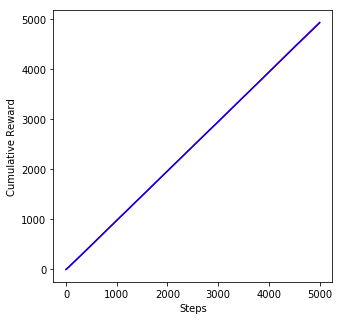

In [4]:
SEED = 319028492
NUM_ITERS = 5000
rng = RandomState(SEED)
probas = [rng.rand() for _ in range(10)]

thompson_solver = create_solver(probas, rng, "thompson")
epsilon_solver = create_solver(probas, rng, "epsilon")

r_thompson, c_thompson = solve(thompson_solver, NUM_ITERS)
r_epsilon, c_epsilon = solve(epsilon_solver, NUM_ITERS)

plt.figure(figsize=(5, 5))
plt.plot(r_thompson, label='Thompson Sampling', c='r')
plt.plot(r_epsilon, label='e-greedy (0.01)', c='b')
plt.xlabel('Steps')
plt.ylabel('Cumulative Reward')
plt.show()

In [5]:
thompson_solver.save("/Users/kevin/Desktop/exp-1/", "1")
epsilon_solver.save("/Users/kevin/Desktop/exp-1/", "1")

# Averaging Seeds

In [ ]:
seeds = [0, 42, 185, 4982, 13942]
rewards = {'ts': [], 'eg': []}
counters = {'ts': [], 'eg': []}
NUM_ITERS = 5000

for seed in seeds:
    rng = RandomState(seed)
    probas = [rng.rand() for _ in range(10)]

    thompson_solver = create_solver(probas, rng, "thompson")
    epsilon_solver = create_solver(probas, rng, "epsilon")

    r_thompson, c_thompson = solve(thompson_solver, NUM_ITERS)
    r_epsilon, c_epsilon = solve(epsilon_solver, NUM_ITERS)
    
    rewards['ts'].append(r_thompson)
    rewards['eg'].append(r_epsilon)
    counters['ts'].append(c_thompson)
    counters['eg'].append(c_epsilon)
    
    # plt.figure(figsize=(5, 5))
    # plt.plot(r_thompson, label='Thompson Sampling', c='r')
    # plt.plot(r_epsilon, label='e-greedy (0.01)', c='b')
    # plt.xlabel('Steps')
    # plt.ylabel('Cumulative Reward')
    # plt.show()